## Annular aperture 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
from scipy.integrate import cumtrapz,simps
import numpy as np
from scipy import interpolate
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio
import scipy.special as sp

import pint

u = pint.UnitRegistry()

We find out diffraction pattern of annular aperture at various z distances from aperture by compute_U function

In [2]:
def compute_U(xv, yv, lam, z):
    
    # defining annular aperture of inner radius 2.85mm and outer radius 3mm
    U00 = np.heaviside(R+3,1)-np.heaviside(R-3,1) - (np.heaviside(R+2.85,1)-np.heaviside(R-2.85,1))
    U0 = U00
    
    
    # beam propagation using angular spectrum method
    A = fft2(U0)
    kx = 2*np.pi * fftfreq(len(x), np.diff(x)[0])
    kxv, kyv = np.meshgrid(kx,kx)
    k = 2*np.pi/lam
    ans =  ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))
    return (np.abs(ans))**2
# this function returns intensity of propagated beam at meshgrid points xv,yv at z distance away from annular aperture


In [3]:
lam = 660 * 10**(-6)     #defining wavelength of the beam used (660 nm)

x = np.linspace(-5,5,2000)  
xv, yv = np.meshgrid(x, x)  # defining 2d meshgrid points

R = np.sqrt(xv**2+yv**2)    # radial distance 
U0 = np.heaviside(R+3,1)-np.heaviside(R-3,1)  #defining 3mm aperture
U0 = U0.astype(float)
print(x.shape)

(2000,)


Plotting aperture using compute_U function defined earlier

In [4]:
U = compute_U(xv, yv, lam, z=0)

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


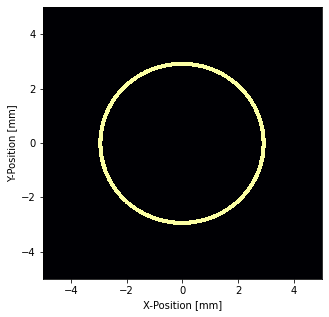

In [5]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U), cmap='inferno')
plt.xlabel('X-Position [mm]')
plt.ylabel('Y-Position [mm]')
plt.show()


In [6]:
k = np.arange(0,2000,1)

on axis intensity (normalized to 1 at z=100cm where we start observing bessel beam)

In [7]:
L = []
lam = 660*10**(-6)
for z in range(0,6400,100):
    c = compute_U(xv,yv,lam,z)
    L.append(max((c[1000][:])**2)/11.484341774490833)
print(L)
print(L[10])

[0.08707508184937623, 0.3157582896083433, 0.5831073900565138, 0.17287253720594528, 0.7477519489958421, 0.7822677541870322, 0.01939005741079457, 0.0012730893626078483, 0.082308631062259, 0.41212036448361145, 1.0, 1.3999752574015172, 1.4780425005471423, 1.5079496498095026, 1.4590849749179235, 1.4972904687635071, 1.2031837296195254, 1.4382351186999545, 1.4079898024591033, 0.7017133629554054, 0.9225999520214532, 0.736644839632665, 0.8121055401594703, 0.6244789731647145, 0.48652238009396687, 0.38774318545183195, 0.44170100982839516, 0.49173775056589025, 0.26177440361137466, 0.40309894827841236, 0.25115497656423724, 0.26843109090352624, 0.4290169657102776, 0.20167211610742294, 0.17934426357349195, 0.20250552178419476, 0.20247086980397372, 0.10271336564852042, 0.0570458954783858, 0.17011608861619482, 0.18830447207325, 0.21821562482594375, 0.03881439239981525, 0.057191492822691155, 0.07972583781385596, 0.11011053450425089, 0.10183094920830973, 0.07551889905363234, 0.05293862953488712, 0.029629

### plotting on axis intensity as a function of distance z from aperture

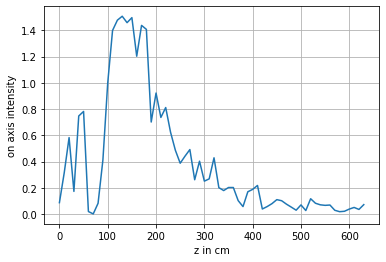

In [8]:
kk = range(0,640,10)
plt.plot(kk,L)

plt.xlabel('z in cm')
plt.ylabel('on axis intensity')
plt.grid()
plt.show()

### calculating power contained within 3 mm radius (aperture size) from axis

In [9]:
h = 10/2000
lam = 660*10**(-6)
l = []
def uu(xv,yv):
     return (np.heaviside(np.sqrt(xv**2+yv**2)+3,1)-np.heaviside(np.sqrt(xv**2+yv**2)-3,1))
for z in range(0,6400,100):
    u = compute_U(xv,yv,lam,z)*uu(xv,yv)       
    a = 0
    for i in k:
        for j in k:
            a += h*h*(u[i][j])
    print(a/2.7546999999969146)
    l.append(a/2.7546999999969146)

1.0
0.6619522458292565
0.5811766850287953
0.5524523810438514
0.535401159229201
0.5271086600365656
0.5182226399342182
0.5161862763330715
0.5133578299474544
0.5041981876883277
0.49675627227873564
0.493575864420965
0.4912392498890484
0.49023556732918955
0.4907843327279234
0.4937147302623921
0.4975787181322989
0.4988788745528095
0.4957986849201078
0.4928814768370628
0.4932583979958769
0.4919275018325751
0.48547440433877526
0.48973876404248184
0.47713077797038517
0.48024460572219757
0.4730113108864693
0.4664271904044786
0.47036190392811233
0.45725518351545447
0.4509691189354603
0.45572367136667924
0.4480763785180553
0.4389729049918209
0.43759567963496937
0.44285653254291346
0.43829878892491453
0.4268165035274086
0.41982495746973225
0.41979313472922897
0.42246463073068363
0.42328909272329746
0.4170521043455181
0.40578792923558643
0.40193443480912566
0.40222767657891667
0.4026153710687647
0.40695885786322844
0.40802145403875384
0.40726126320584255
0.40077943049516807
0.39090568559184447
0.384

### plotting power within 3mm radius as function of distance

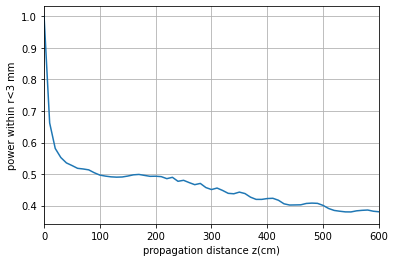

In [10]:
kk = range(0,640,10)
plt.plot(kk,l)
plt.xlabel('propagation distance z(cm)')
plt.ylabel('power within r<3 mm')
#plt.title('annular aperture power plot')
plt.xlim(0,600)
plt.grid()
plt.show()